In [10]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mylibs.mylib3 import *

# JET REPRESENTATION

Here we represent a jet with R=1. Every particle is a point in the rapidity-azimuthal angle plane and the radius of this point is proportional at the transverse momentum of the particle.

In [11]:
df = pd.read_csv(r'db.csv')
print(df)

            pt       eta      phi
0     3.613920  0.228856  2.80730
1     1.154760  0.455024  2.86465
2     2.305130  1.449710  3.47821
3     0.044787  1.190960  2.90239
4     0.413010  0.615377  3.70936
5     8.782670  1.051860  3.37302
6     1.508700  1.005500  3.15469
7    56.075200  1.051730  3.24869
8    41.905600  1.047240  3.20666
9    64.728700  1.075530  3.21937
10    2.122160  0.459673  3.48965
11   14.571600  0.625810  3.12836
12    1.850960  0.942204  3.31358
13    9.712110  0.654481  3.34743
14    6.913120  0.863659  3.41862
15    7.596860  0.798420  3.33948
16   19.048600  0.788588  3.34252
17    3.438010  0.840285  3.43494
18   31.366900  0.799288  3.38340
19  160.563000  0.765212  3.43768
20    8.346540  0.802834  3.43520


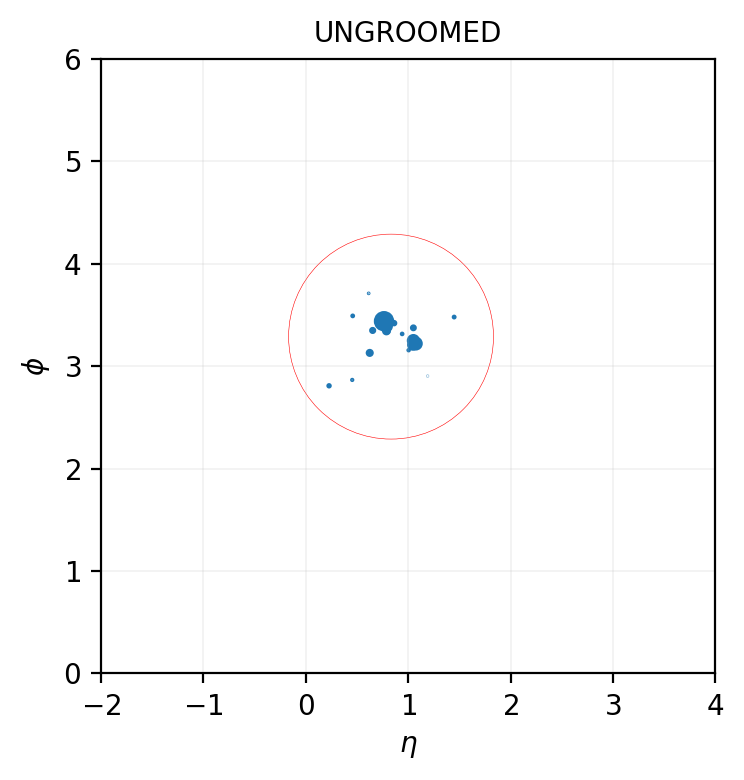

In [12]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
ungroomed = df.plot.scatter(x=' eta', y=' phi', ax=ax, s=.25*df.pt).get_figure()
boundary =  plt.Circle((df[" eta"].mean(), df[" phi"].mean()), 1, fill=False, color='red', linewidth=.2)
ax.add_artist(boundary)
set_x_axis(ax, [-2, 4, 1])
set_y_axis(ax, [0, 6, 1])
ax.set_aspect(1)
ax.grid(linewidth=.1, linestyle='-')
ax.set_xlabel("$\eta$", fontsize=10)
ax.set_ylabel("$\phi$", fontsize=10)
ax.set_title("UNGROOMED", fontsize=10)
plt.tight_layout()
#ungroomed.savefig('ungroomed.pdf')

# JET CLUSTERING AND GROOMING PROCESS

Here we want to show step-by-step - with the same philosophy of the previous picture - a pictorial representation of a jet clustering procedure and the effect of a groomer (Soft Drop) on a Z+jet event.

In [13]:
df_all = pd.read_csv(r'all.csv')
df_all = df_all[['pt', 'eta', 'phi']]
print("List of all the particle in our event:")
print(df_all)

List of all the particle in our event:
           pt       eta       phi
0   85.906900  1.531290  3.879110
1    4.832340 -1.759210  5.948430
2    5.463000  2.047710  3.303190
3    7.749460 -3.207430  0.152457
4    1.924110  2.753120  3.092310
..        ...       ...       ...
57   0.092534  1.687010  0.170694
58   1.256940 -1.247730  5.347560
59   6.165650  1.946010  3.801720
60   0.363919  0.809549  3.115380
61   0.000022  0.649369  0.622987

[62 rows x 3 columns]


In [14]:
# df2 has to be contained by df1

def drop_duplicates(df1, df2):
    dict = {}
    for key in df1.keys():
                dict[key] = []
            
    for row1 in df1.iterrows():
        found = False
        for row2 in df2.iterrows():
            if row1[1].equals(row2[1]):
                found = True
                
        if not found:
            for key in df1.keys():
                dict[key].append(row1[1][key])
    
    return pd.DataFrame(dict)

In [15]:
df_jetsU = pd.read_csv(r'jets_U.csv')
print("List of all the jets (different num values) after the clustering:")
print(df_jetsU)

df_jetsSD = pd.read_csv(r'jets_SD.csv')
print("\nList of all the jets after the grooming procedure:")
print(df_jetsSD)

df_soft = drop_duplicates(df_jetsU, df_jetsSD)
print("\nList of all the soft particle removed from the jets by the grooming procedure:")
print(df_soft)

df_out = drop_duplicates(df_all, df_jetsU.drop(columns=['num']))
print("\nList of all the particle not contained in a jet:")
print(df_out)

List of all the jets (different num values) after the clustering:
   num         pt      eta      phi
0    0   5.463000  2.04771  3.30319
1    0   0.846128  2.17262  4.34335
2    0   0.947127  1.80689  3.40836
3    0   1.848370  1.97218  4.02696
4    0   6.165650  1.94601  3.80172
5    0  15.589900  1.88298  3.88860
6    0  15.525400  1.62342  3.83606
7    0  85.906900  1.53129  3.87911
8    0  72.213600  1.54204  3.95266

List of all the jets after the grooming procedure:
   num        pt      eta      phi
0    0  15.52540  1.62342  3.83606
1    0  85.90690  1.53129  3.87911
2    0  72.21360  1.54204  3.95266
3    0   1.84837  1.97218  4.02696
4    0   6.16565  1.94601  3.80172
5    0  15.58990  1.88298  3.88860

List of all the soft particle removed from the jets by the grooming procedure:
   num        pt      eta      phi
0  0.0  5.463000  2.04771  3.30319
1  0.0  0.846128  2.17262  4.34335
2  0.0  0.947127  1.80689  3.40836

List of all the particle not contained in a jet:
       

### Picture of all the particle produced in the event

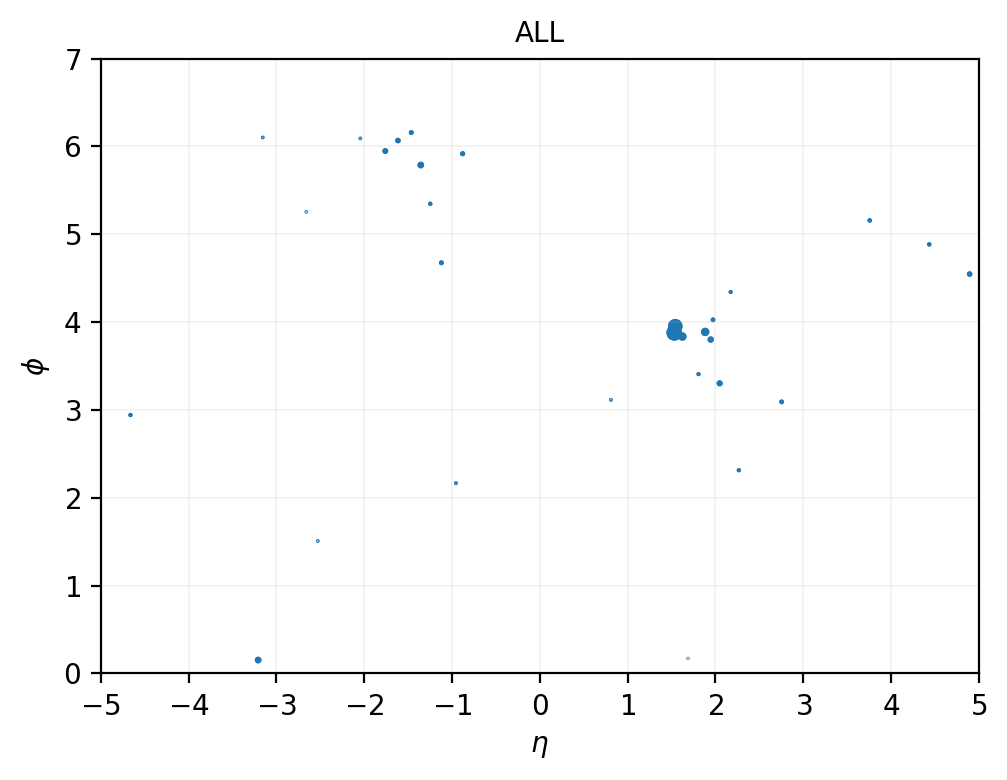

In [16]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
all_particles = df_all.plot.scatter(x='eta', y='phi', ax=ax, s=.25*df_all.pt).get_figure()
set_x_axis(ax, [-5, 5, 1])
set_y_axis(ax, [0, 7, 1])
ax.set_aspect(1)
ax.grid(linewidth=.1, linestyle='-')
ax.set_xlabel("$\eta$", fontsize=10)
ax.set_ylabel("$\phi$", fontsize=10)
ax.set_title("ALL", fontsize=10)
plt.tight_layout()
#all_particles.savefig('all_particles.pdf')

### Picture of all the particle after jet clustering

Working on the jet n°0.
   num         pt      eta      phi
0    0   5.463000  2.04771  3.30319
1    0   0.846128  2.17262  4.34335
2    0   0.947127  1.80689  3.40836
3    0   1.848370  1.97218  4.02696
4    0   6.165650  1.94601  3.80172
5    0  15.589900  1.88298  3.88860
6    0  15.525400  1.62342  3.83606
7    0  85.906900  1.53129  3.87911
8    0  72.213600  1.54204  3.95266


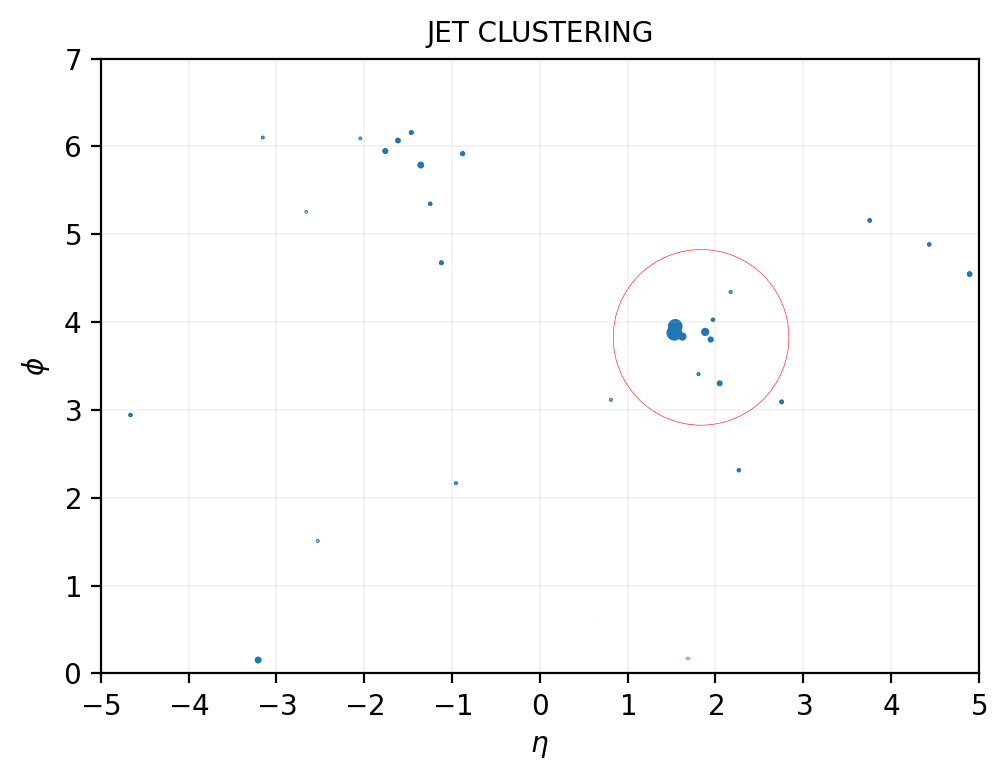

In [17]:
s=0.25
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
jet_out = df_out.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_out.pt).get_figure()

import matplotlib.cm as cm
colors = cm.Dark2(range(len(pd.unique(df_jetsU.num))))

for i, c in zip(pd.unique(df_jetsU.num), colors):
    print("Working on the jet n°" + str(i) + ".")
    df_jet = df_jetsU.groupby("num").get_group(i)
    print(df_jet)
    boundary =  plt.Circle((df_jet["eta"].mean(), df_jet["phi"].mean()), 1, fill=False, color='red', linewidth=.2)
    ax.add_artist(boundary)
    jet_in = df_jetsU.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_jetsU.pt).get_figure()

set_x_axis(ax, [-5, 5, 1])
set_y_axis(ax, [0, 7, 1])
ax.set_aspect(1)
ax.grid(linewidth=.1, linestyle='-')
ax.set_xlabel("$\eta$", fontsize=10)
ax.set_ylabel("$\phi$", fontsize=10)
ax.set_title("JET CLUSTERING", fontsize=10)
plt.tight_layout()
#jet_clustering.savefig('jet_clustering.pdf')

### Picture of all the particle after the grooming procedure

Working on the jet n°0.
   num         pt      eta      phi
0    0   5.463000  2.04771  3.30319
1    0   0.846128  2.17262  4.34335
2    0   0.947127  1.80689  3.40836
3    0   1.848370  1.97218  4.02696
4    0   6.165650  1.94601  3.80172
5    0  15.589900  1.88298  3.88860
6    0  15.525400  1.62342  3.83606
7    0  85.906900  1.53129  3.87911
8    0  72.213600  1.54204  3.95266


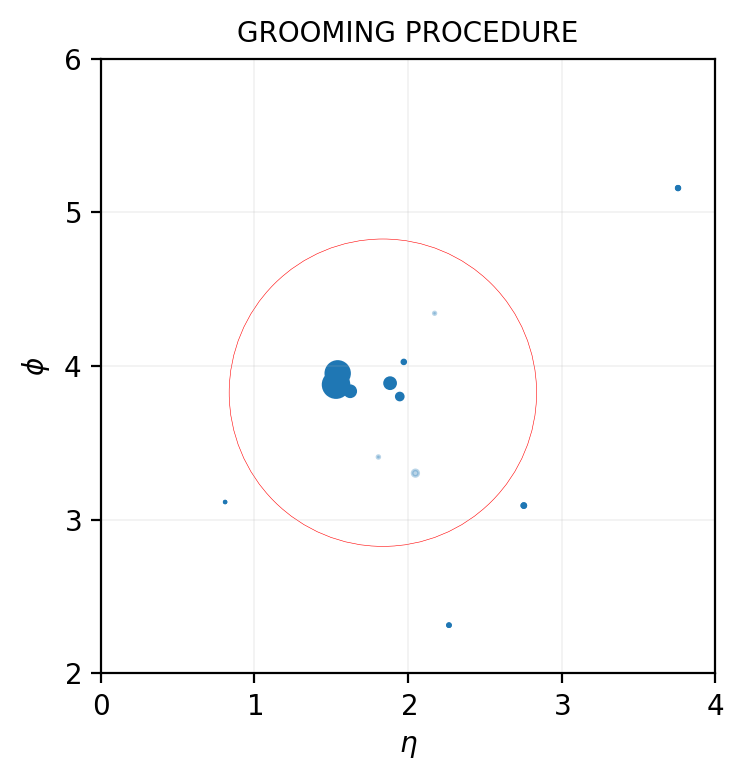

In [18]:
s=1
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
jet_out = df_out.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_out.pt).get_figure()

import matplotlib.cm as cm
colors = cm.Dark2(range(len(pd.unique(df_jetsU.num))))

for i, c in zip(pd.unique(df_jetsU.num), colors):
    print("Working on the jet n°" + str(i) + ".")
    df_jet = df_jetsU.groupby("num").get_group(i)
    print(df_jet)
    boundary =  plt.Circle((df_jet["eta"].mean(), df_jet["phi"].mean()), 1, fill=False, color='red', linewidth=.2)
    ax.add_artist(boundary)
    jet_in = df_jetsSD.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_jetsSD.pt).get_figure()
    
    jet_drop =  df_soft.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_soft.pt, alpha=.3).get_figure()

set_x_axis(ax, [0, 4, 1])
set_y_axis(ax, [2, 6, 1])
ax.set_aspect(1)
ax.grid(linewidth=.1, linestyle='-')
ax.set_xlabel("$\eta$", fontsize=10)
ax.set_ylabel("$\phi$", fontsize=10)
ax.set_title("GROOMING PROCEDURE", fontsize=10)
plt.tight_layout()
#jet_clustering.savefig('jet_clustering.pdf')

# DISTANCE AND ANGULARITY AS VECTORS IN THIS PLANE 

Working on the jet n°0.
   num         pt      eta      phi
0    0   5.463000  2.04771  3.30319
1    0   0.846128  2.17262  4.34335
2    0   0.947127  1.80689  3.40836
3    0   1.848370  1.97218  4.02696
4    0   6.165650  1.94601  3.80172
5    0  15.589900  1.88298  3.88860
6    0  15.525400  1.62342  3.83606
7    0  85.906900  1.53129  3.87911
8    0  72.213600  1.54204  3.95266


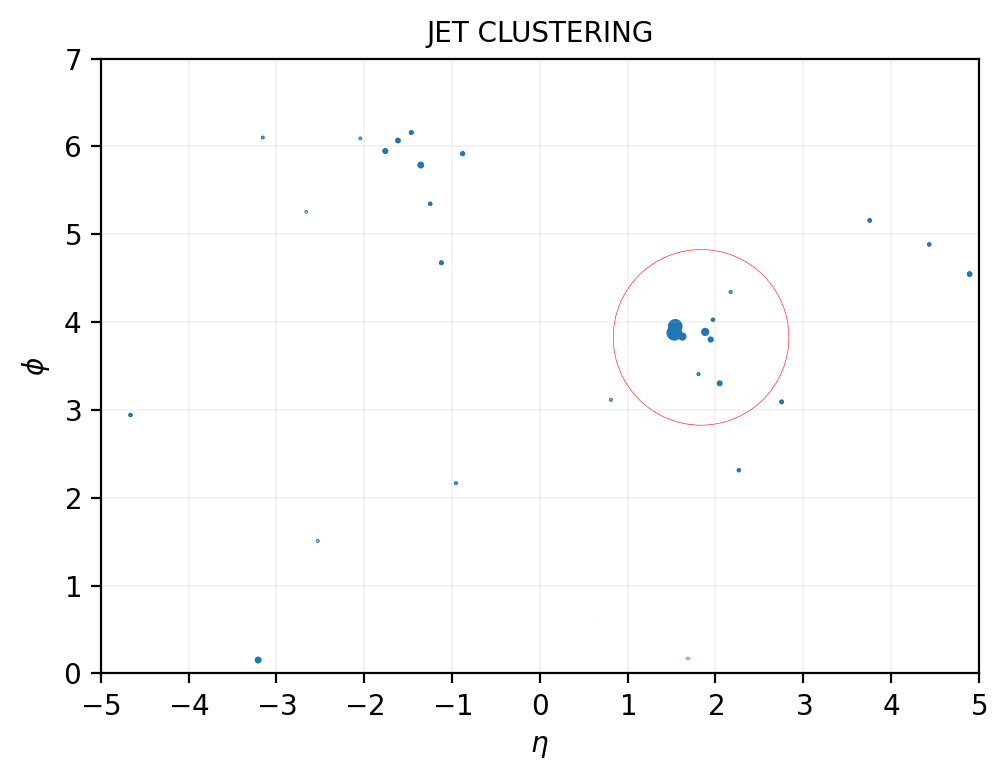

In [20]:
s=0.25
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
jet_out = df_out.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_out.pt).get_figure()

import matplotlib.cm as cm
colors = cm.Dark2(range(len(pd.unique(df_jetsU.num))))

for i, c in zip(pd.unique(df_jetsU.num), colors):
    print("Working on the jet n°" + str(i) + ".")
    df_jet = df_jetsU.groupby("num").get_group(i)
    print(df_jet)
    boundary =  plt.Circle((df_jet["eta"].mean(), df_jet["phi"].mean()), 1, fill=False, color='red', linewidth=.2)
    ax.add_artist(boundary)
    jet_in = df_jetsU.plot.scatter(x='eta', y='phi', ax=ax, s=s*df_jetsU.pt).get_figure()

set_x_axis(ax, [-5, 5, 1])
set_y_axis(ax, [0, 7, 1])
ax.set_aspect(1)
ax.grid(linewidth=.1, linestyle='-')
ax.set_xlabel("$\eta$", fontsize=10)
ax.set_ylabel("$\phi$", fontsize=10)
ax.set_title("JET CLUSTERING", fontsize=10)
plt.tight_layout()
#jet_clustering.savefig('jet_clustering.pdf')

In [28]:
p = -1
R = 1

d_B = (df_all.pt**(2*p))*R**2
d = min(df_all.pt**(2*p), 3)

print(d)

2
